In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ThisDir = "C3d_ThreePointIntSync" #CHANGE THIS BY HAND!!!

OrdParamDir  = "{}_r".format(ThisDir)

PlotDir  = "{}_Plots".format(ThisDir)

In [3]:
K1_List = np.linspace(-2.0, 2.0, 21)
K2_List = np.linspace(0.0, 2.0, 21)

In [4]:
ic_omega = 0
ic_theta_start, ic_theta_stop = 0, 8

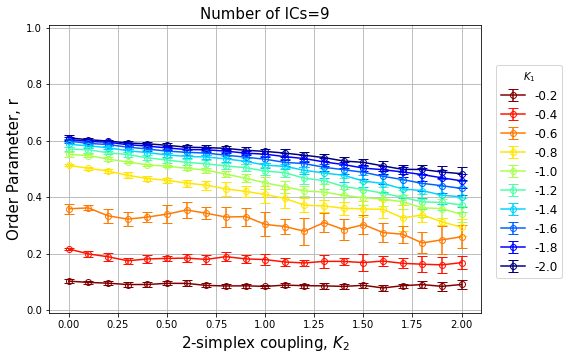

In [5]:
kk1_start, kk1_stop = 0, 10
#--------------------------------------------------
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#-------------------------
MyColors1 = plt.cm.jet( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
#-------------------------
for ii, kk1 in enumerate(range(kk1_start, kk1_stop)):
    K1 = K1_List[kk1]
    
    r3_K2sweep_df = pd.DataFrame()
    
    for ic_theta in range(ic_theta_start, ic_theta_stop+1):
        r3_K2sweep = []
        for kk2, K2 in enumerate(K2_List):
        #for kk2, K2 in enumerate(K2_List[:kk2_stop]):
            r3_FileName = f"{OrdParamDir}/{ThisDir}_r_data_omega{ic_omega}_theta{ic_theta}_K2_{kk2}.csv"
            r3_df = pd.read_csv(r3_FileName)
            r3_K2sweep.append(r3_df["TimeAvg"][kk1])
        r3_K2sweep_df[f"theta{ic_theta}"] = r3_K2sweep
    
    ax.errorbar(K2_List, r3_K2sweep_df.mean(axis=1), r3_K2sweep_df.std(axis=1), c=MyColors1[ii],
                fmt='o-', fillstyle="none", capsize=5, alpha=1, label=f"{K1:.1f}")
#-------------------------
ax.set(xlim=[-0.1, 2.1], ylim=[-0.01, 1.01])

ax.set_ylabel("Order Parameter, r", fontsize=15)
ax.set_xlabel(r"2-simplex coupling, $K_{2}$", fontsize=15)
ax.set_title(f"Number of ICs={ic_theta_stop-ic_theta_start+1}", fontsize=15)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title=f"$K_1$", fontsize=12,
          loc='lower left', bbox_to_anchor=(1.02, 0.1))
ax.grid(True)
#-------------------------
FigName = f"{PlotDir}/{ThisDir}_r_vs_K2_omega{ic_omega}_theta{ic_theta_start}to{ic_theta_stop}_p1.png"
plt.savefig(FigName, format="png", transparent=False, bbox_inches="tight", pad_inches=0.1)
#-------------------------
plt.show()

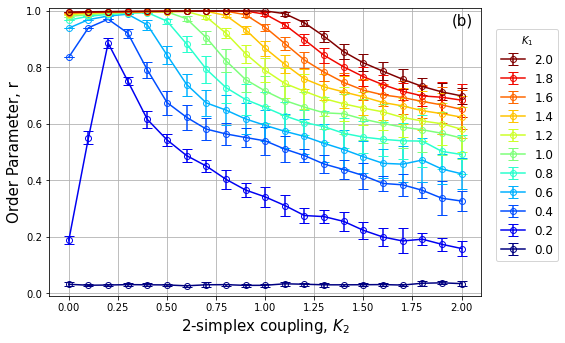

In [12]:
kk1_start, kk1_stop = 10, 21
#--------------------------------------------------
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#-------------------------
MyColors2 = plt.cm.jet( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
#-------------------------
for ii, kk1 in enumerate(range(kk1_start, kk1_stop)):
    K1 = K1_List[kk1]
    
    r3_K2sweep_df = pd.DataFrame()
    
    for ic_theta in range(ic_theta_start, ic_theta_stop+1):
        r3_K2sweep = []
        for kk2, K2 in enumerate(K2_List):
            r3_FileName = f"{OrdParamDir}/{ThisDir}_r_data_omega{ic_omega}_theta{ic_theta}_K2_{kk2}.csv"
            r3_df = pd.read_csv(r3_FileName)
            r3_K2sweep.append(r3_df["TimeAvg"][kk1])
        r3_K2sweep_df[f"theta{ic_theta}"] = r3_K2sweep
    
    ax.errorbar(K2_List, r3_K2sweep_df.mean(axis=1), r3_K2sweep_df.std(axis=1), c=MyColors2[ii],
                fmt='o-', fillstyle="none", capsize=5, alpha=1, label=f"{K1:.1f}")
#-------------------------
ax.text(1.95, 0.95, "(b)", fontsize=15)
#-------------------------
ax.set(xlim=[-0.1, 2.1], ylim=[-0.01, 1.01])

ax.set_ylabel("Order Parameter, r", fontsize=15)
ax.set_xlabel(r"2-simplex coupling, $K_{2}$", fontsize=15)
# ax.set_title(f"Number of ICs={ic_theta_stop-ic_theta_start+1}", fontsize=15)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title=f"$K_1$", fontsize=12,
          loc='lower left', bbox_to_anchor=(1.02, 0.1))
ax.grid(True)
#-------------------------
FigName = f"{PlotDir}/{ThisDir}_r_vs_K2_omega{ic_omega}_theta{ic_theta_start}to{ic_theta_stop}_p2.png"
plt.savefig(FigName, format="png", transparent=False, bbox_inches="tight", pad_inches=0.1)
#-------------------------
plt.show()